# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Disa Rahma Kirana
- **Email:** dissa21002@mail.unpad.ac.id
- **ID Dicoding:** dissark

## Menentukan Pertanyaan Bisnis

1.   Bagaimana tren penyewaan sepeda dalam beberapa tahun terakhir?
2.   Lebih unggul mana antara pelanggan Registered dengan Casual?
3.   Apakah cuaca berpengaruh terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## Data Wrangling

### Gathering Data

Setelah melakukan import packages yang diperlukan, langkah selanjutnya adalah mengumpulkan data. Data yang akan digunakan pada analisis kali ini adalah data Bike Sharing Dataset yang bersumber dari website Kaggle.com. Data ini memiliki dua jenis yaitu day.csv dan hour.csv.

**Memanggil dan mendefinisikan data day.csv sebagai day_df**

In [3]:
# Memanggil dan mendefinisikan data day.csv sebagai day_df
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memanggil dan mendefinisikan data houe.csv sebagai hour_df**

In [4]:
# Memanggil dan mendefinisikan data hour.csv sebagai hour_df
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Memeriksa tipe data dari tiap kolom yang terdapat pada kedua jenis data**

In [5]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Berdasarkan kolom pada data, diketahui bahwa terdapat 1 tipe data yang tidak sesuai. Kolom tersebut adalah dteday, dimana perlu kita ubah tipenya menjadi datetime.

**Memeriksa keberadaan missing value pada data**

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil diatas, dapat disimpulkan bahwa **tidak terdapat missing value** di kedua jenis data, maka analisis bisa dilanjutkan.

**Memeriksa keberadaan duplikasi pada data**

In [8]:
print("Jumlah duplikasi pada data: ", day_df.duplicated().sum())
print("Jumlah duplikasi pada data: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data:  0
Jumlah duplikasi pada data:  0


Hasil menunjukan angka 0, artinya tidak terdapat duplikasi data. Maka, dapat dipastikan seluruh elemen data bersifat unik.

**Memeriksa parameter statistik melalui kolom numerik data tersebut**

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat disimpulkan bahwa parameter statistik kedua jenis data tersebut tidak menunjukan keanehan.

### Cleaning Data

**Menghapus kolom yang tidak akan digunakan**

In [11]:
day_df.drop(['instant'], axis = 1, inplace= True)
hour_df.drop(['instant'], axis = 1, inplace= True)

Kolom yang tidak akan digunakan pada analisis kali ini merupakan kolom 'instant', kolom ini tidak akan digunakan karena nilai datanya tidak memberikan informasi yang berguna.

**Mengubah tipe data 'object' menjadi 'datetime'**

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Tipe data kolom dteday berhasil diubah menjadi tipe datetime

**Mengubah tipe data 'int' menjadi 'category'**

In [13]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

Tipe data pada kolom season, mnth, holiday, weekday dan weathersit berhasil diubah menjadi tipe 'category'

**Mengubah nama judul kolom**

In [14]:
# Mengubah nama judul kolom pada data day.csv
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count_column',
    'hum': 'humidity'
}, inplace=True)

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_column
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# Mengubah nama judul kolom pada data hour.csv
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'hr': 'hours',
    'mnth':'month',
    'weathersit': 'weather_situation',
    'cnt': 'count_column',
    'hum': 'humidity'
}, inplace=True)

hour_df.head()

,date,season,year,month,hours,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_column
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah nama judul kolom telah berhasil dilakukan. Perubahan ini dilakukan agar nama kolom pada data dapat lebih mudah dikenali.

**Mengubah isi kolom menjadi keterangan kategori**

In [16]:
# Mengubah isi kolom pada data day.csv
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
day_df['weather_situation'] = day_df['weather_situation'].map({
    1: 'Clear',
    2: 'Misty',
    3: 'Light_rainsnow',
    4: 'Heavy_rainsnow'
})
day_df['year'] = day_df['year'].map({
    0: '2011',
    1: '2012'
})

# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100

In [17]:
# Mengubah isi kolom pada data hour.csv
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
hour_df['weather_situation'] = hour_df['weather_situation'].map({
    1: 'Clear',
    2: 'Misty',
    3: 'Light_rainsnow',
    4: 'Heavy_rainsnow'
})
hour_df['year'] = hour_df['year'].map({
    0: '2011',
    1: '2012'
})

# Menghitung Humidity
hour_df['humidity'] = hour_df['humidity']*100

Seperti yang terlihat, perubahan isi kolom menjadi keterangan kategori sudah berhasil. Hal ini dilakukan agar data lebih mudah untuk dipahami

**Mengelompokan Nilai Humidity sesuai tingkatannya**

In [18]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Kering"
    elif humidity >= 45 and humidity < 65:
        return "Normal"
    else:
        return "Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

## Exploratory Data Analysis (EDA)

### Explore data hour.csv

**Melihat rangkuman parameter statistik secara keseluruhan pada data hour.csv**

In [19]:
hour_df.describe(include="all")

<ipython-input-19-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,date,season,year,month,hours,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_column,humidity_category
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,731,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lembab
freq,24,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8356
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN


Berdasarkan hasil parameter statistik, diperoleh informasi bahwa pada data hour_csv memiliki jumlah pelanggan sebanyak 17379. Pada rentang pukul 00.00 - 23.59, rata-rata penyewaan sepeda terjadi pada jam 11.54 dengan standar deviasinya sebesar 6.91.

**Mengelompokkan penyewaan sepeda berdasarkan jam di data hour.csv**

In [20]:
hour_df.groupby(by='hours').agg({
    'count_column': ['max', 'min', 'mean', 'sum']
})

count_column                        
               max min        mean     sum
hours                                     
0              283   2   53.898072   39130
1              168   1   33.375691   24164
2              132   1   22.869930   16352
3               79   1   11.727403    8174
4               28   1    6.352941    4428
5               66   1   19.889819   14261
6              213   1   76.044138   55132
7              596   1  212.064649  154171
8              839   5  359.011004  261001
9              426  14  219.309491  159438
10             539   8  173.668501  126257
11             663  10  208.143054  151320
12             776   3  253.315934  184414
13             760  11  253.661180  184919
14             750  12  240.949246  175652
15             750   7  251.233196  183149
16             783  11  311.983562  227748
17             976  15  461.452055  336860
18             977  23  425.510989  309772
19             743  11  311.523352  226789
20             567  11  226.030220  164550
21             584   6  172.314560  125445
22             502   9  131.335165   95612
23             256   2   87.831044   63941

Berdasarkan hasil diatas, dapat disimpulkan bahwa jam yang memiliki jumlah pelanggan terbanyak adalah jam 17.00 dengan rata-rata sebesar 461.45. Sedangkan jam yang memiliki jumlah pelanggan tersedikit adalah jam 04.00 dengan rata-rata sebesar 6.35.

**Mengelompokkan penyewaan sepeda berdasarkan bulan di data hour.csv**

In [21]:
hour_df.groupby(by='month').agg({
    'count_column': ['max', 'min', 'mean', 'sum']
})

count_column                        
               max min        mean     sum
month                                     
Jan            559   1   94.424773  134933
Feb            610   1  112.865026  151352
Mar            957   1  155.410726  228920
Apr            822   1  187.260960  269094
May            873   1  222.907258  331686
Jun            900   1  240.515278  346342
Jul            913   1  231.819892  344948
Aug            941   1  238.097627  351194
Sep            977   1  240.773138  345991
Oct            963   1  222.158511  322352
Nov            729   1  177.335421  254831
Dec            759   1  142.303439  211036

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki jumlah pelanggan terbanyak adalah bulan Agustus dengan rata-rata sebesar 238. Sedangkan bulan yang memiliki jumlah pelanggan tersedikit adalah bulan Januari dengan rata-rata sebesar 94.42.

### Explore data day.csv

**Melihat rangkuman parameter statistik secara keseluruhan pada dataframe day.csv**

In [22]:
day_df.describe(include="all")

<ipython-input-22-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_column,humidity_category
count,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,731,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
freq,1,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN


Berdasarkan hasil parameter statistik, diperoleh informasi bahwa pada data day.csv memiliki jumlah pelanggan sebanyak 731.

**Mengelompokkan penyewaan sepeda berdasarkan bulan di data day.csv**

In [23]:
day_df.groupby(by='month').agg({
    'count_column': ['max', 'min', 'mean', 'sum']
})

count_column                           
               max   min         mean     sum
month                                        
Jan           4521   431  2176.338710  134933
Feb           5062  1005  2655.298246  151352
Mar           8362   605  3692.258065  228920
Apr           7460   795  4484.900000  269094
May           8294  2633  5349.774194  331686
Jun           8120  3767  5772.366667  346342
Jul           8173  3285  5563.677419  344948
Aug           7865  1115  5664.419355  351194
Sep           8714  1842  5766.516667  345991
Oct           8156    22  5199.225806  322352
Nov           6852  1495  4247.183333  254831
Dec           6606   441  3403.806452  211036

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki jumlah pelanggan terbanyak adalah bulan Agustus dengan rata-rata sebesar 5664.41. Sedangkan bulan yang memiliki jumlah pelanggan tersedikit adalah bulan Januari dengan rata-rata sebesar 2176.33.

**Mengelompokkan penyewaan sepeda berdasarkan jam di data day.csv**

In [24]:
day_df.groupby(by='year').agg({
    'count_column': ['max', 'min', 'mean', 'sum']
})

count_column                           
              max  min         mean      sum
year                                        
2011         6043  431  3405.761644  1243103
2012         8714   22  5599.934426  2049576

Berdasarkan hasil diatas, dapat disimpulkan bahwa tahun yang memiliki jumlah pelanggan terbanyak adalah 2012 dengan rata-rata sebesar 5599.93.

**Mengelompokkan penyewaan sepeda berdasarkan musim di data day.csv**

In [25]:
day_df.groupby(by='season').agg({
    'count_column': ['max', 'min', 'mean', 'sum']
})

count_column                            
                max   min         mean      sum
season                                         
Spring         7836   431  2604.132597   471348
Summer         8362   795  4992.331522   918589
Fall           8714  1115  5644.303191  1061129
Winter         8555    22  4728.162921   841613

Berdasarkan hasil diatas, dapat disimpulkan bahwa musim yang memiliki jumlah pelanggan terbanyak adalah Fall dengan rata-rata sebesar 5644.3. Sedangkan musim yang memiliki jumlah pelanggan tersedikit adalah musim Spring dengan rata-rata sebesar 2604.13.

**Mengelompokkan penyewaan sepeda berdasarkan kondisi cuaca di data day.csv**

In [26]:
# penyewaan berdasarkan jam
day_df.groupby(by='weather_situation').agg({
    'count_column': ['max', 'min', 'mean', 'sum']
})

count_column                           
                           max  min         mean      sum
weather_situation                                        
Clear                     8714  431  4876.786177  2257952
Misty                     8362  605  4035.862348   996858
Light_rainsnow            4639   22  1803.285714    37869

Berdasarkan hasil diatas, dapat disimpulkan bahwa musim yang memiliki jumlah pelanggan terbanyak adalah Clear dengan rata-rata sebesar 4876.79. Sedangkan musim yang memiliki jumlah pelanggan tersedikit adalah Light_rainsnow dengan rata-rata sebesar 1803.29.

**Mengelompokkan penyewaan sepeda berdasarkan jumlah tiap jenis di data day.csv**

In [27]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan hasil diatas, dapat disimpulkan pada tahun 2011 dan 2012 jenis yang menghasilkan jumlah pelanggan terbanyak adalah registered.

**Mengelompokkan temp, hum dan humidity berdasarkan season di data day.csv**

In [28]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

temp                         atemp                     humidity  \
             max       min      mean       max       min      mean      max   
season                                                                        
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  94.8261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  92.2500   
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  93.9565   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  97.2500   

                            
            min       mean  
season                      
Spring   0.0000  58.290291  
Summer  25.4167  62.694833  
Fall    36.0000  63.348206  
Winter  33.3478  66.871917

Berdasarkan hasil diatas, dapat disimpulkan bahwa rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring. Sedangkan rata-rata humidity tertinggi terjadi pada musim terjadi pada musim dingin (winter season) yang selanjutnya diikuti oleh fall, summer, dan spring.

**Melihat hubungan antara jenis penyewaan sepeda casual, registered, dan count**

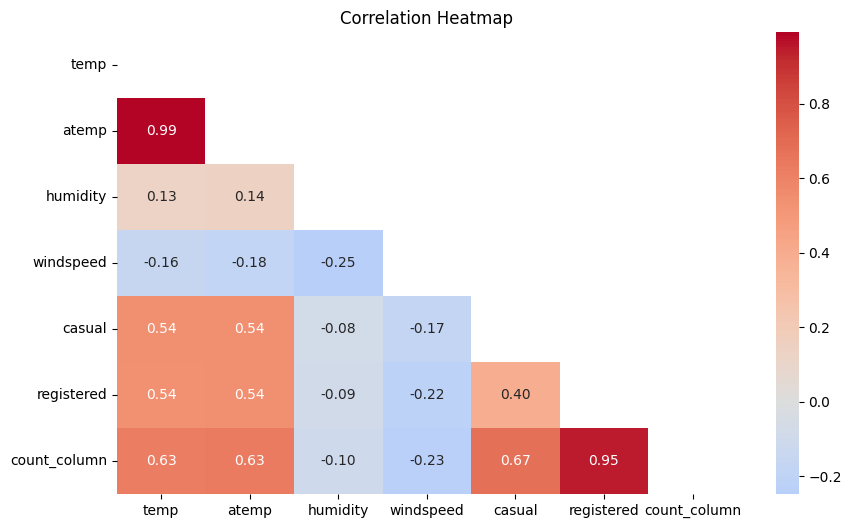

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas,dapat disimpulkan jenis registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40). Dapat dilihat pula bahwa atemp dan temp sangat berkorelasi (0.99)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dalam beberapa tahun terakhir?

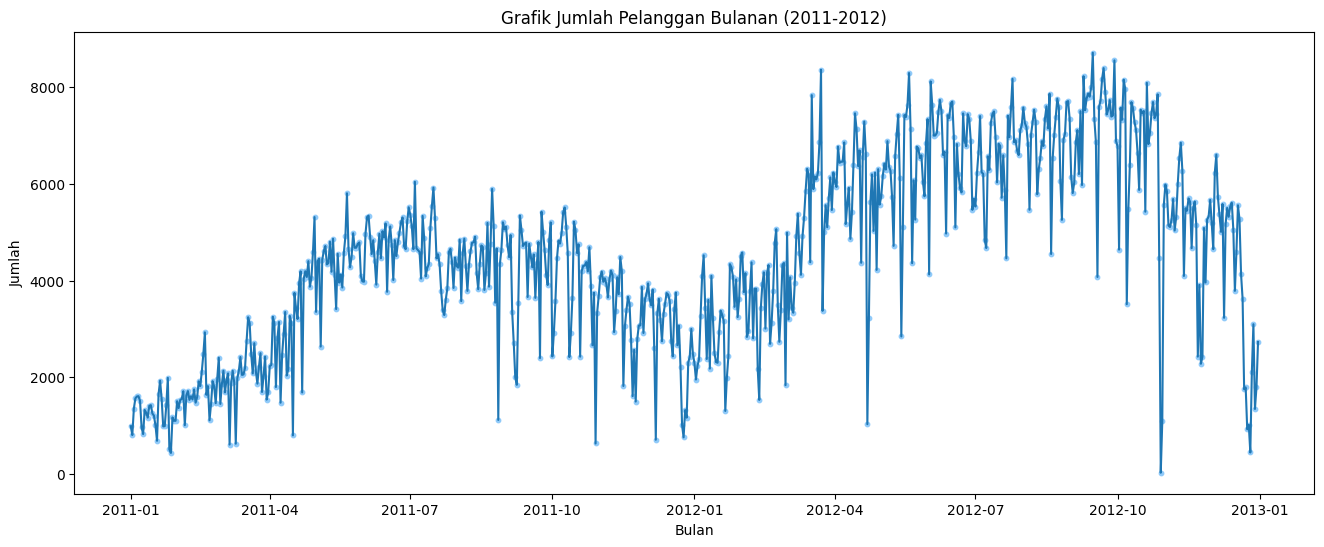

In [30]:
# Langkah 1 : Buat figure dengan ukuran (16, 6)
plt.figure(figsize=(16, 6))

# Langkah 2 : Hitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['count_column'].groupby(day_df['date']).max()

# Langkah 3 : Buat scatter plot untuk jumlah pelanggan maksimum per bulan
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# Langkah 4 : Buat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# Langkah 5 : Beri nama untuk sumbu x
plt.xlabel('Bulan')

# Langkah 6 : Beri nama untuk sumbu y
plt.ylabel('Jumlah')

# Langkah 7 : Beri judul yang menggambarkan grafik tersebut
plt.title('Grafik Jumlah Pelanggan Bulanan (2011-2012)')

# Langkah 8 : Tampilkan hasil grafik tersebut
plt.show()

Melalui grafik di atas, dapat dilihat bahwa tren yang terjadi dimulai dari jumlah yang rendah di setiap awal tahun, kemudian mulai meningkat di pertengahan tahun, dan kemudian menurun menjelang akhir tahun.
Jumlah pelanggan terbanyak terjadi pada bulan September tahun 2012. Sedangkan penurunan jumlah pelanggan yang cukup signifikan terjadi pada bulan November dan December tahun 2012. Untuk mendukung hasil tersebut, akan dilakukan analisis yang sama menggunakan line plot sebagai berikut:

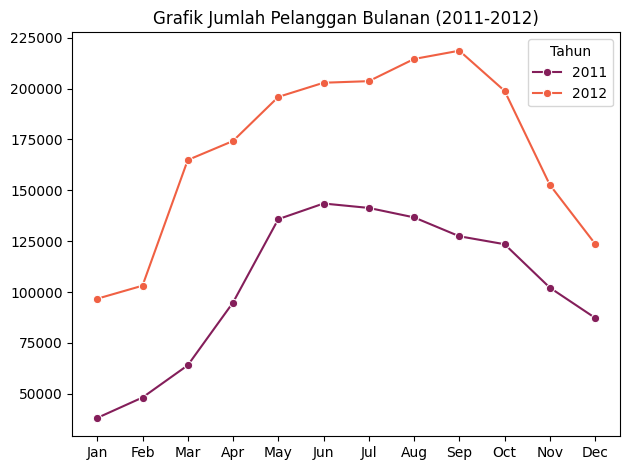

In [31]:
# Langkah 1 : Definisikan kolom yang akan digunakan
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

# Langkah 2 : Kelompokkan jumlah pelanggan berdasarkan bulan dan tahun
monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count_column": "sum"
}).reset_index()

# Langkah 3 : Buat line plot dan sesuaikan warna yang diinginkan
sns.lineplot(data=monthly_counts,x="month", y="count_column", hue="year", palette="rocket", marker="o")

# Langkah 4 : Beri judul dan nama untuk sumbu
plt.title("Grafik Jumlah Pelanggan Bulanan (2011-2012)")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()

# Langkah 5 : Tampilkan hasil grafik tersebut
plt.show()

Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa tahun 2012 lebih unggul daripada tahun 2011. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari. Hasil ini menunjukan hasil yang sama dengan analisis sebelumnya.

### Pertanyaan 2:   Lebih unggul mana antara pelanggan Registered dengan Casual?

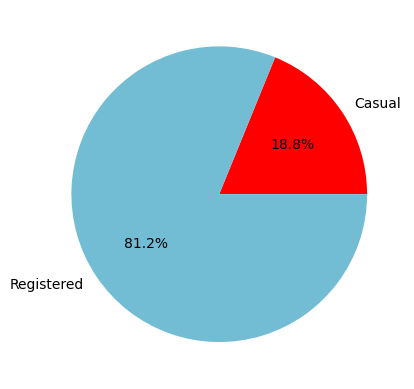

In [32]:
# Langkah 1 : Jumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Langkah 2 : Jumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Langkah 3 : Definisikan data yang akan digunakan
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Langkah 4 : Buat pie plot dengan warna yang diinginkan
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#ff0000", "#72BCD4"])

# Langkah 5 : Tampilkan hasil pie plot
plt.show()

Melalui hasil pie plot diatas, dapat dilihat bahwa **pelanggan Registered terlihat lebih unggul** dengan persentase sebanyak 81.2% mengalahkan pelanggan Casual sebanyak 18.8%.

### Pertanyaan 3: Apakah cuaca berpengaruh terhadap jumlah penyewa sepeda?

<ipython-input-61-a93287995a7b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


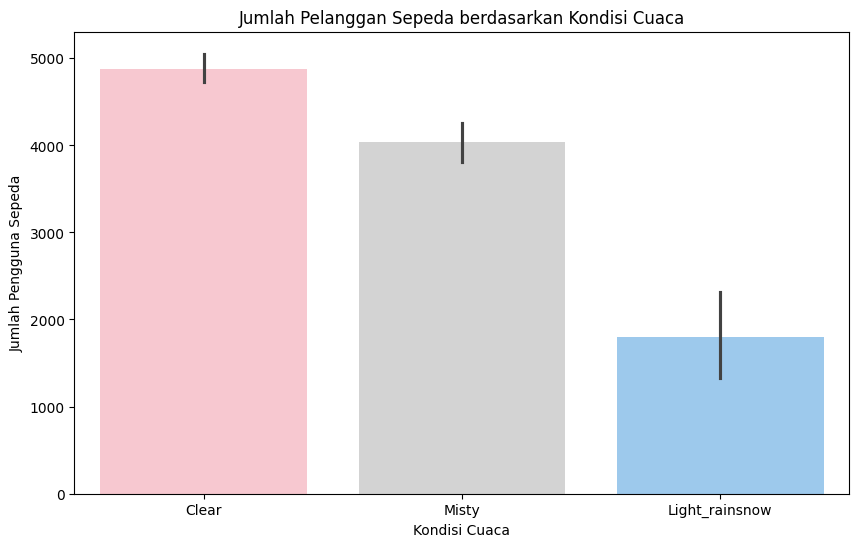

In [61]:
# Langkah 1 : Atur warna dan buat figure dengan ukuran (10, 6)
colors = ["#FFC0CB", "#D3D3D3", "#90CAF9"]
plt.figure(figsize=(10,6))

# Langkah 2 : Buat barplot untuk y="count_column" dan x="weather_situation", menggunakan data=day_df
sns.barplot(
    x='weather_situation',
    y='count_column',
    palette=colors,
    data=day_df)

# Langkah 3 : Beri judul dan nama untuk sumbu
plt.title('Jumlah Pelanggan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')

# Langkah 4 : Tampilkan hasil barplot tersebut
plt.show()



Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda. Kondisi cuaca saat *Clear* (cerah) menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca *Misty* (mendung), dan terakhir ketika cuaca sedang *Light_rainsnow* (hujan salju ringan) menjadi yang paling sedikit diminati.

## Conclusion

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dalam beberapa tahun terakhir?

> Tren penyewaan sepeda yang terjadi biasanya dimulai dari jumlah yang rendah di setiap awal tahun, kemudian mulai meningkat di pertengahan tahun, dan kemudian menurun menjelang akhir tahun. Dapat dilihat bahwa puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan Januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari. Faktanya, tahun 2012 memiliki jumlah lebih unggul daripada tahun 2011.

### Pertanyaan 2: Lebih unggul mana antara pelanggan Registered dengan Casual?

> Melalui hasil pie plot yang telah dibuat, diperoleh hasil bahwa pelanggan Registered terlihat lebih unggul dengan persentase sebanyak 81.2% mengalahkan pelanggan Casual sebanyak 18.8%.

### Pertanyaan 3: Apakah cuaca berpengaruh terhadap jumlah penyewa sepeda?

> Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda. Kondisi cuaca saat *Clear* (cerah) menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca *Misty* (mendung), dan terakhir ketika cuaca sedang *Light_rainsnow* (hujan salju ringan) menjadi yang paling sedikit diminati.

## Teknik Analisis Lanjutan - Clustering

**Total Pengguna berdasarkan Kondisi Cuaca**

In [35]:
hour_df.groupby(by="weather_situation").count_column.nunique().sort_values(ascending=False)

weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_column, dtype: int64

Dari hasil diatas, dapat diidentifikasi bahwa kelompok pelanggan yang paling banyak cenderung menyewa sepeda saat cuaca clear.

**Total Pengguna berdasarkan Humidity**

In [36]:
hour_df.groupby(by="humidity_category").agg({
    "count_column": ["count"]})

,count_column
,count
humidity_category,
Kering,3518
Lembab,8356
Normal,5505


Dari hasil diatas, dapat diidentifikasi bahwa kelompok pelanggan yang paling banyak cenderung menyewa sepeda saat humidity lembab.

### Menyimpan berkas data yang telah dibersihkan

In [37]:
day_df.to_csv("day_df.csv", index=False)

In [38]:
hour_df.to_csv("hour_df.csv", index=False)